# PyTorch Operations

**numpy** + AutoGrad
- 다차원 Arrays를 표현하는 PyTorch 클래스
- 사실상 numpy의 ndarray와 동일(그러므로 TensorFlow의 Tensor와도 동일)
- Tensor를 생성하는 함수도 거의 동일

In [5]:
import torch
import numpy as np

In [11]:
# numpy - ndarray
n_array = np.arange(10).reshape(2, 5)
print(n_array)
print("ndim :", n_array.ndim, 'shape :', n_array.shape)

print()
# pytorch - tensor
t_array = torch.FloatTensor(n_array)
print(t_array)
print("ndim :", t_array.ndim, 'shape :', t_array.shape)

[[0 1 2 3 4]
 [5 6 7 8 9]]
ndim : 2 shape : (2, 5)

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
ndim : 2 shape : torch.Size([2, 5])


In [12]:
# Tensor 생성은 list나 ndarray를 사용 가능

# data to tensor
data = [[3, 5], [10, 5]]
x_data = torch.tensor(data)
x_data

tensor([[ 3,  5],
        [10,  5]])

In [13]:
# ndarray to tensor
nd_array_ex = np.array(data)
tensor_array = torch.from_numpy(nd_array_ex)
tensor_array

tensor([[ 3,  5],
        [10,  5]], dtype=torch.int32)

## 기본적으로 tensor가 가질 수 있는 data타입은 numpy와 동일
### (C에서 쓸 수 있는 데이터 타입을 사용할 수 있다.)

### 기본적으로 pytorch의 대부분의 사용법이 그대로 적용된다.
----
# numpy like operations

In [14]:
data = [[3, 5, 20], [10, 5, 50], [1, 5, 10]]
x_data = torch.tensor(data)

# 슬라이싱
x_data[1:]

tensor([[10,  5, 50],
        [ 1,  5, 10]])

In [15]:
# 슬라이싱
x_data[:2, 1:]

tensor([[ 5, 20],
        [ 5, 50]])

In [16]:
# 1차원으로 펼치기
x_data.flatten()

tensor([ 3,  5, 20, 10,  5, 50,  1,  5, 10])

In [17]:
# 연산할 때 크기를 맞춰서 해야할 일이 많기 때문에 은근 자주 사용된다.
torch.ones_like(x_data)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [18]:
# numpy로 변환
x_data.numpy()

array([[ 3,  5, 20],
       [10,  5, 50],
       [ 1,  5, 10]], dtype=int64)

In [19]:
# shape 확인
x_data.shape

torch.Size([3, 3])

In [20]:
# datatype 확인
x_data.dtype

torch.int64

----
### pytorch의 tensor는 GPU에 올려서 사용가능

In [21]:
x_data.device

device(type='cpu')

In [22]:
# 내 노트북에는 GPU가 없다....
# Colab 에서 GPU로 변경하고 하면 됨.
if torch.cuda.is_available():
    x_data_cuda = x_data.to('cuda')
x_data.cuda.device
# device(type='cuda', index=0)

AttributeError: 'builtin_function_or_method' object has no attribute 'device'

----

# Tensor handling
- view : reshape과 동일하게 tensor의 shape을 변환
- squeeze : 차원의 개수가 1인 차원을 삭제(압축)
- unsqueeze : 차원의 개수가 1인 차원을 추가

In [23]:
tensor_ex = torch.rand(size=(2, 3, 2))
tensor_ex

tensor([[[0.1683, 0.3948],
         [0.6464, 0.4105],
         [0.0857, 0.7834]],

        [[0.8708, 0.3769],
         [0.9829, 0.1205],
         [0.7287, 0.9565]]])

In [24]:
tensor_ex.view([-1, 6]) # [2, 6]

tensor([[0.1683, 0.3948, 0.6464, 0.4105, 0.0857, 0.7834],
        [0.8708, 0.3769, 0.9829, 0.1205, 0.7287, 0.9565]])

In [25]:
tensor_ex.reshape([-1, 6]) # [2, 6]

tensor([[0.1683, 0.3948, 0.6464, 0.4105, 0.0857, 0.7834],
        [0.8708, 0.3769, 0.9829, 0.1205, 0.7287, 0.9565]])

- view와 reshape은 contiguity 보장의 차이

In [26]:
a = torch.zeros(3, 2)
b = a.view(2, 3)
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [27]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [28]:
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [32]:
a = torch.zeros(3, 2)
b = a.t().reshape(6)
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [33]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [34]:
b

tensor([0., 0., 0., 0., 0., 0.])

> view는 메모리 주소를 같게 할당한다??는데 그냥 view를 쓰라고 하신다...!
굳이 몰라도 상관없다..!?

squeeze, unsqueeze

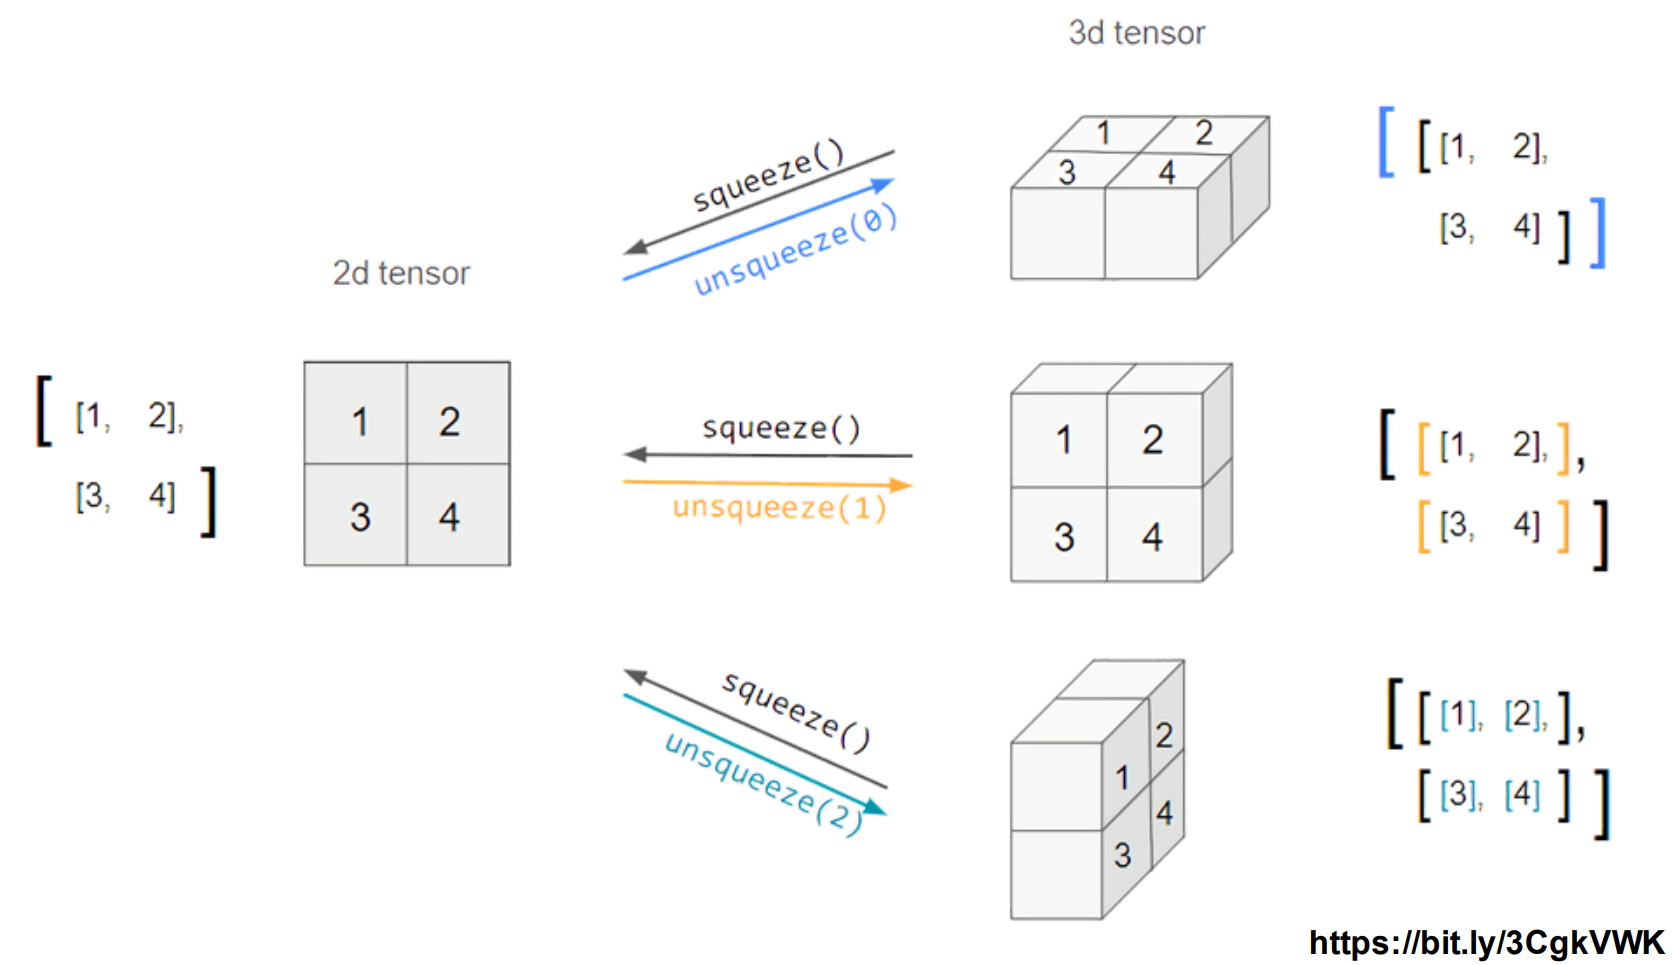

In [36]:
tensor_ex = torch.rand(size=(2, 1, 2))
tensor_ex

tensor([[[0.1499, 0.4807]],

        [[0.7014, 0.0419]]])

In [41]:
print(tensor_ex.squeeze().shape)
tensor_ex.squeeze()

torch.Size([2, 2])


tensor([[0.1499, 0.4807],
        [0.7014, 0.0419]])

In [42]:
tensor_ex = torch.rand(size=(2, 2))
print(tensor_ex.unsqueeze(0).shape)
tensor_ex.unsqueeze(0)

torch.Size([1, 2, 2])


tensor([[[0.8164, 0.9707],
         [0.8399, 0.7932]]])

In [43]:
print(tensor_ex.unsqueeze(1).shape)
tensor_ex.unsqueeze(1)

torch.Size([2, 1, 2])


tensor([[[0.8164, 0.9707]],

        [[0.8399, 0.7932]]])

In [44]:
print(tensor_ex.unsqueeze(2).shape)
tensor_ex.unsqueeze(2)

torch.Size([2, 2, 1])


tensor([[[0.8164],
         [0.9707]],

        [[0.8399],
         [0.7932]]])

----

In [49]:
# 기본적인 tensor의 operations는 numpy와 동일
n1 = np.arange(10).reshape(2, 5)
t1 = torch.FloatTensor(n1)
t1

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [46]:
t1 + t1

tensor([[ 0.,  2.,  4.,  6.,  8.],
        [10., 12., 14., 16., 18.]])

In [47]:
t1 - t1

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [48]:
t1 + 10

tensor([[10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]])

In [50]:
# 행렬곱셈 연산은 함수는 dot이 아닌 mm 사용
n2 = np.arange(10).reshape(5, 2)
t2 = torch.FloatTensor(n2)
t2

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [54]:
t1.mm(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [55]:
t1.dot(t2)

RuntimeError: 1D tensors expected, got 2D, 2D tensors at ..\aten\src\TH/generic/THTensorEvenMoreMath.cpp:83

In [56]:
t1.matmul(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [57]:
# scalar 일 때는 dot으로 내적이 된다.
a = torch.rand(10)
b = torch.rand(10)
a.dot(b)

tensor(2.6887)

In [58]:
a.mm(b)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

#### mm과 matmul은 broadcasting 지원

In [59]:
a = torch.rand(5, 2, 3)
b = torch.rand(5)
a.mm(b)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [62]:
a = torch.rand(5, 2, 3)
a

tensor([[[0.5886, 0.4971, 0.7378],
         [0.7916, 0.5953, 0.8229]],

        [[0.1796, 0.4755, 0.5731],
         [0.9009, 0.7231, 0.3848]],

        [[0.3891, 0.0819, 0.5624],
         [0.8159, 0.6582, 0.0766]],

        [[0.5396, 0.3680, 0.5347],
         [0.1897, 0.9407, 0.0159]],

        [[0.8192, 0.5769, 0.2955],
         [0.2544, 0.3994, 0.8938]]])

In [63]:
b = torch.rand(3)
b

tensor([0.2858, 0.1888, 0.7177])

In [64]:
a.matmul(b)

tensor([[0.7915, 0.9292],
        [0.5524, 0.6702],
        [0.5302, 0.4124],
        [0.6074, 0.2432],
        [0.5551, 0.7896]])

----
# Tensro operations for ML/DL formula
- nn.functional 모듈을 통해 다양한 수식 변환을 지원함

In [65]:
import torch
import torch.nn.functional as F

tensor = torch.FloatTensor([0.5, 0.7, 0.1])
h_tensor = F.softmax(tensor, dim=0)
h_tensor

tensor([0.3458, 0.4224, 0.2318])

In [69]:
y = torch.randint(5, (10, 5))
y_label = y.argmax(dim=1)
y_label

tensor([0, 3, 4, 3, 2, 4, 0, 4, 4, 4])

In [70]:
torch.nn.functional.one_hot(y_label)

tensor([[1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1]])

In [67]:
y_label

tensor([0, 0, 3, 1, 3, 4, 2, 4, 3, 2])

In [71]:
y

tensor([[4, 1, 3, 1, 0],
        [2, 1, 3, 3, 1],
        [3, 0, 4, 0, 4],
        [2, 4, 4, 4, 3],
        [3, 1, 4, 3, 0],
        [3, 1, 1, 1, 4],
        [4, 1, 0, 0, 1],
        [1, 2, 2, 2, 2],
        [2, 4, 4, 3, 4],
        [3, 3, 0, 1, 3]])

----

In [72]:
import itertools
a = [1, 2, 3]
b = [4, 5]
list(itertools.product(a, b))

[(1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5)]

In [73]:
tensor_a = torch.tensor(a)
tensor_b = torch.tensor(b)
torch.cartesian_prod(tensor_a, tensor_b)

tensor([[1, 4],
        [1, 5],
        [2, 4],
        [2, 5],
        [3, 4],
        [3, 5]])

----
# AutoGrad
- PyTorch의 핵심은 자동 미분의 지원 -> backward 함수 사용

In [75]:
w = torch.tensor(2.0, requires_grad = True)
y = w**2
z = 10*y + 25

z.backward()
w.grad

tensor(40.)

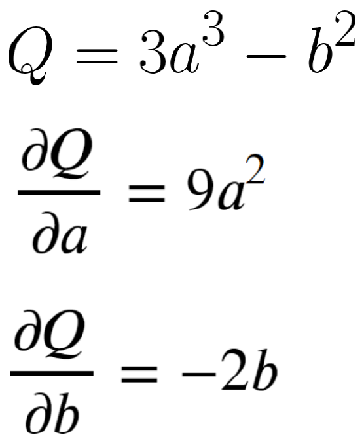

In [82]:
a = torch.tensor([2., 3.], requires_grad = True)
b = torch.tensor([6., 4.], requires_grad = True)
Q = 3*a**3 - b**2
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [76]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [77]:
a.grad

tensor([36., 81.])

In [78]:
b.grad

tensor([-12.,  -8.])

# *Reference*

#### 1.
[AutoGrad 튜토리얼](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

[한국어..](https://tutorials.pytorch.kr/beginner/blitz/autograd_tutorial.html)

### 2.
[Tensor와 AutoGrad 튜토리얼](https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_autograd.html)

[한국어..](https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html)

직접 미분 계산한 것과 자동미분 코드 차이 보기